# **Time series prediction using RNN – Stock Market Analysis**

### Step 1: Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

### Step 2: Load the dataset

In [4]:
dataframe = pd.read_csv('/content/tesla.csv')  # Ensure the dataset has 'Date' and 'Close' columns
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe.set_index('Date', inplace=True)

### Step 3: Preprocess the data (Normalization)

In [5]:
closing_prices = dataframe[['Close']].values
scaler_obj = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler_obj.fit_transform(closing_prices)

### Step 4: Create sequences for the RNN

In [6]:
def generate_sequences(data, seq_len):
    X_seq, y_seq = [], []
    for idx in range(len(data) - seq_len):
        X_seq.append(data[idx:idx + seq_len])
        y_seq.append(data[idx + seq_len])
    return np.array(X_seq), np.array(y_seq)

sequence_len = 60  # You can modify the sequence length as needed
X_features, y_labels = generate_sequences(normalized_data, sequence_len)

### Step 5: Split the data into train and test sets

In [7]:
train_test_split_idx = int(len(X_features) * 0.8)
X_train_data, y_train_data = X_features[:train_test_split_idx], y_labels[:train_test_split_idx]
X_test_data, y_test_data = X_features[train_test_split_idx:], y_labels[train_test_split_idx:]

### Step 6: Build the RNN model

In [8]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='relu', input_shape=(sequence_len, 1)))
rnn_model.add(Dense(1))  # Output layer for predicting the stock price

rnn_model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Step 7: Train the model

In [9]:
training_history = rnn_model.fit(X_train_data, y_train_data, epochs=10, batch_size=32, validation_data=(X_test_data, y_test_data))

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0388 - val_loss: 6.8694e-04
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.1638e-05 - val_loss: 5.3278e-04
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.2950e-05 - val_loss: 5.1888e-04
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.9990e-05 - val_loss: 5.0271e-04
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.8378e-05 - val_loss: 5.3007e-04
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.7127e-05 - val_loss: 5.2913e-04
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.9941e-05 - val_loss: 5.8742e-04
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.7196e-05 - val_loss: 5.0228e-04
Epoch 9/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.4383e-05 - val_loss: 5.7959e-04
Epoch 10/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.6043e-05 - val_loss: 5.0416e-04


### Step 8: Predict for the next 20 days

In [10]:
future_predictions = []
recent_sequence = normalized_data[train_test_split_idx - sequence_len:train_test_split_idx]

for _ in range(20):  # Predict for the next 20 days
    recent_sequence = np.reshape(recent_sequence, (1, sequence_len, 1))  # Ensure correct shape for RNN
    predicted_price = rnn_model.predict(recent_sequence)

    future_predictions.append(predicted_price[0][0])  # Store predicted price

    # Reshape predicted price and append it to the sequence
    predicted_price = np.reshape(predicted_price, (1, 1, 1))
    recent_sequence = np.append(recent_sequence[:, 1:, :], predicted_price, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


### Step 9: Inverse transform the predicted prices to the original scale

In [11]:
predicted_future_prices = scaler_obj.inverse_transform(np.array(future_predictions).reshape(-1, 1))

### Step 10: Compare with actual prices (next 20 days)

In [12]:
actual_future_prices = scaler_obj.inverse_transform(normalized_data[train_test_split_idx:train_test_split_idx+20])

### Step 11: Plot the results

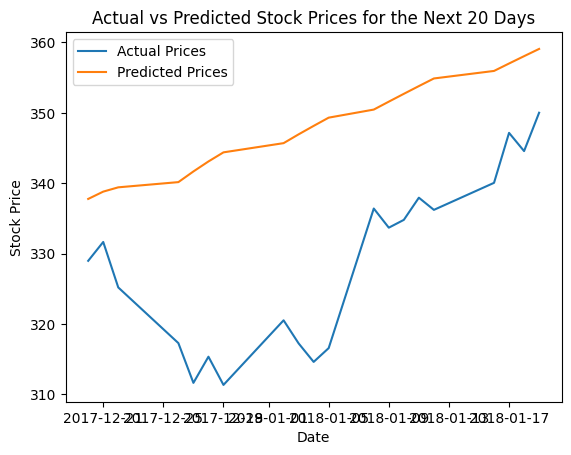

In [13]:
plt.plot(dataframe.index[train_test_split_idx:train_test_split_idx+20], actual_future_prices, label='Actual Prices')
plt.plot(dataframe.index[train_test_split_idx:train_test_split_idx+20], predicted_future_prices, label='Predicted Prices')
plt.title('Actual vs Predicted Stock Prices for the Next 20 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Step 12: Print actual and predicted prices for the next 20 days

In [14]:
for day in range(20):
    print(f"Day {day+1}: Actual: {actual_future_prices[day][0]}, Predicted: {predicted_future_prices[day][0]}")

Day 1: Actual: 328.980011, Predicted: 337.7732238769531
Day 2: Actual: 331.660004, Predicted: 338.8116149902344
Day 3: Actual: 325.200012, Predicted: 339.422119140625
Day 4: Actual: 317.290009, Predicted: 340.16229248046875
Day 5: Actual: 311.640015, Predicted: 341.677734375
Day 6: Actual: 315.359985, Predicted: 343.0973205566406
Day 7: Actual: 311.350006, Predicted: 344.391357421875
Day 8: Actual: 320.529999, Predicted: 345.69891357421875
Day 9: Actual: 317.25, Predicted: 346.9515686035156
Day 10: Actual: 314.619995, Predicted: 348.15130615234375
Day 11: Actual: 316.579987, Predicted: 349.32159423828125
Day 12: Actual: 336.410004, Predicted: 350.4683837890625
Day 13: Actual: 333.690002, Predicted: 351.5943298339844
Day 14: Actual: 334.799988, Predicted: 352.7065734863281
Day 15: Actual: 337.950012, Predicted: 353.8046569824219
Day 16: Actual: 336.220001, Predicted: 354.8880615234375
Day 17: Actual: 340.059998, Predicted: 355.9576416015625
Day 18: Actual: 347.160004, Predicted: 357.014